<a href="https://colab.research.google.com/github/josebravogarcia/DeepLearning/blob/main/tutorials/importar_labeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import IPython.display as display
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
import skimage.io as io
import os


!pip install -q pycocotools
from pycocotools.coco import COCO

!git clone https://github.com/josebravogarcia/DeepLearning
%cd DeepLearning/main/tutorials

Cloning into 'DeepLearning'...
remote: Enumerating objects: 112, done.
remote: Counting objects: 100% (112/112), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 112 (delta 25), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (112/112), 50.60 MiB | 9.28 MiB/s, done.
Resolving deltas: 100% (25/25), done.
[Errno 2] No such file or directory: 'DeepLearning/main/tutorials'
/content/DeepLearning/tutorials


In [4]:
%cd DeepLearning/tutorials
!ls

/content/DeepLearning/tutorials/DeepLearning/tutorials
'190917_201514_0000000003_&icapbk[000].bmp'
'190917_201537_0000000004_&icapbk[000].bmp'
'190917_201558_0000000005_&icapbk[000].bmp'
'190917_201618_0000000006_&icapbk[000].bmp'
'190917_201639_0000000007_&icapbk[000].bmp'
'190917_201703_0000000008_&icapbk[000].bmp'
'190917_201723_0000000009_&icapbk[000].bmp'
'190917_201743_0000000010_&icapbk[000].bmp'
'190917_201804_0000000011_&icapbk[000].bmp'
'190917_201829_0000000012_&icapbk[000].bmp'
'190917_201848_0000000013_&icapbk[000].bmp'
'190917_201907_0000000014_&icapbk[000].bmp'
'190917_201927_0000000015_&icapbk[000].bmp'
'190917_201948_0000000016_&icapbk[000].bmp'
'190917_202008_0000000017_&icapbk[000].bmp'
'190917_202026_0000000018_&icapbk[000].bmp'
'190917_202045_0000000019_&icapbk[000].bmp'
'190917_202105_0000000020_&icapbk[000].bmp'
'190917_202124_0000000021_&icapbk[000].bmp'
'190917_202424_0000000022_&icapbk[000].bmp'
'190917_202444_0000000023_&icapbk[000].bmp'
'190917_202502_000000

In [5]:
img_dir=('.')
annotations_file='coc.json'

#Loading object detection annotations of 2017 validation set using COCO API
coco=COCO(annotations_file)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [9]:
#validation set details
imgIds = coco.getImgIds()
print("Total images: {}".format(len(imgIds)))
rand=2 #np.random.randint(0,len(imgIds))
img = coco.loadImgs(imgIds[rand])[0]
print("Image example:")
print(img)
annIds=coco.getAnnIds()
print("\nTotal annotations: {}".format(len(annIds)))
ann=coco.loadAnns(coco.getAnnIds(imgIds=img['id']))
print("Annotation example:")
print(ann[0])

Total images: 49
Image example:
{'id': 3, 'width': 1600, 'height': 1200, 'file_name': '190917_201558_0000000005_&icapbk[000].bmp', 'license': None, 'flickr_url': '', 'coco_url': None, 'date_captured': '2021-11-20T22:30:04Z'}

Total annotations: 8
Annotation example:


IndexError: ignored

In [30]:
#validation set details
imgIds = coco.getImgIds()
print("Total images: {}".format(len(imgIds)))
rand=17 #np.random.randint(0,len(imgIds))
img = coco.loadImgs(imgIds[rand])[0]
print("Image example:")
print(img)
annIds=coco.getAnnIds()
print("\nTotal annotations: {}".format(len(annIds)))
print(annIds)

gt_ann_ids = coco.getAnnIds(imgIds=[rand])
gt_anns = coco.loadAnns(gt_ann_ids)

print("Annotation example:")
print(gt_anns)

Total images: 49
Image example:
{'id': 18, 'width': 1600, 'height': 1200, 'file_name': '190917_202105_0000000020_&icapbk[000].bmp', 'license': None, 'flickr_url': '', 'coco_url': None, 'date_captured': '2021-11-20T22:30:15Z'}

Total annotations: 8
[0, 1, 2, 3, 4, 5, 6, 7]
Annotation example:
[{'id': 6, 'image_id': 17, 'category_id': 1, 'segmentation': [[1163, 637, 1159, 641, 1159, 646, 1157, 652, 1158, 661, 1158, 667, 1163, 668, 1166, 660, 1168, 655, 1168, 646]], 'area': 239.5, 'bbox': [1157, 637, 11, 31], 'iscrowd': 0}]


In [31]:
cats = coco.loadCats(coco.getCatIds())
print("Number of categories: {}".format(len(cats)))
nms=[cat['name'] for cat in cats]
print('\nCOCO categories: \n{}\n'.format(' '.join(nms)))

Number of categories: 1

COCO categories: 
defect



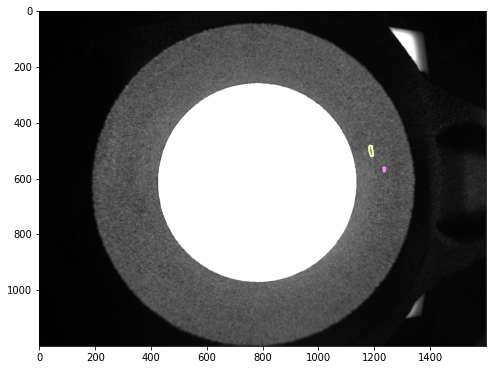

In [95]:
def visualize(img_id):
  img_descriptor = coco.loadImgs(img_id)
  file_name = img_descriptor[0]['file_name']

  fig, ax = plt.subplots(1)


  img = io.imread(file_name)
  ax.imshow(img, cmap='gray')

  gt_ann_ids = coco.getAnnIds(imgIds=[img_id])
  gt_anns = coco.loadAnns(gt_ann_ids)
  #dets = detections_by_imgid[img_id]
  #print("Image", img_id, "Dets", len(dets), "GT", len(gt_anns))

  coco.showAnns(gt_anns, draw_bbox= False)
  

  plt.show() 

visualize(15)

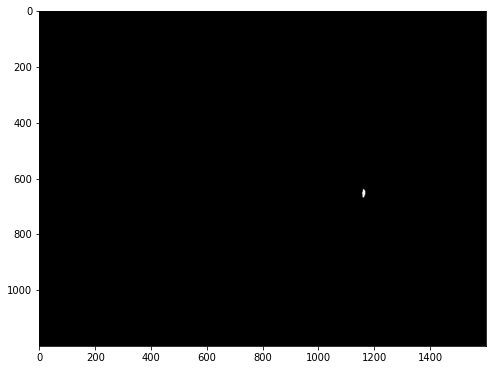

In [75]:
mask = coco.annToMask(gt_anns[0])
for i in range(len(gt_anns)):
    mask += coco.annToMask(gt_anns[i])

plt.imshow(mask, cmap='gray')

In [109]:
def load_images_mask(img_id):
  img_descriptor = coco.loadImgs(img_id)
  file_name = img_descriptor[0]['file_name']

  img = io.imread(file_name)

  gt_ann_ids = coco.getAnnIds(imgIds=[img_id])
  gt_anns = coco.loadAnns(gt_ann_ids)
  
  
  mask = coco.annToMask(gt_anns[0])
  for i in range(len(gt_anns)):
    mask += coco.annToMask(gt_anns[i])

  return img, mask


def plot_images_mask(img_id):
  x_img, y_img = load_images_mask(img_id)

  
  
  plt.subplot(1, 2, 1)
  plt.imshow(x_img, cmap='gray')
  plt.title('Original image')
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.imshow(y_img, cmap='gray')
  plt.title('Prediction')
  plt.axis('off')

  plt.show()

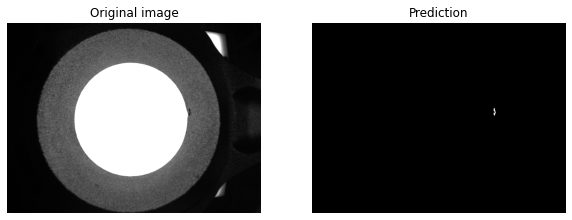

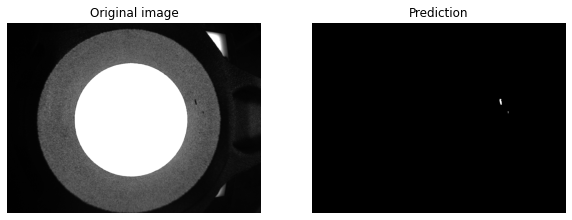

In [117]:
for i in range(14, 16):
  plt.figure(figsize=(10, 10))
  plot_images_mask(i)


In [ ]:
filenames = ['default.tfrecord']
raw_dataset = tf.data.TFRecordDataset(filenames)
raw_dataset

<TFRecordDatasetV2 shapes: (), types: tf.string>

In [ ]:
for raw_record in raw_dataset.take(2):
  print(repr(raw_record))

<tf.Tensor: shape=(), dtype=string, numpy=b'\n\xab\x03\n!\n\x18image/object/class/label\x12\x05\x1a\x03\n\x01\x01\n"\n\x16image/object/bbox/ymax\x12\x08\x12\x06\n\x04\x99\x051?\n\x18\n\x10image/key/sha256\x12\x04\n\x02\n\x00\n?\n\x0eimage/filename\x12-\n+\n)201104_183408_0000000179_&icapbk[000].bmp\n"\n\x16image/object/bbox/xmin\x12\x08\x12\x06\n\x04\xcf\xf7K?\n"\n\x16image/object/bbox/ymin\x12\x08\x12\x06\n\x04\x95\xaf\x1e?\n\x15\n\x0bimage/width\x12\x06\x1a\x04\n\x02\xc0\x0c\n\x15\n\rimage/encoded\x12\x04\n\x02\n\x00\n"\n\x16image/object/bbox/xmax\x12\x08\x12\x06\n\x04\x07_T?\n&\n\x17image/object/class/text\x12\x0b\n\t\n\x07Defecto\n\x16\n\x0cimage/height\x12\x06\x1a\x04\n\x02\xb0\t\n\x14\n\x0cimage/format\x12\x04\n\x02\n\x00\n\x17\n\x0fimage/source_id\x12\x04\n\x02\n\x00'>
<tf.Tensor: shape=(), dtype=string, numpy=b'\n\xd0\x01\n\x18\n\x10image/key/sha256\x12\x04\n\x02\n\x00\n?\n\x0eimage/filename\x12-\n+\n)201103_201817_0000001138_&icapbk[000].bmp\n\x15\n\x0bimage/width\x12\x06\x1a\

In [ ]:
result = {}
i=0

for raw_record in raw_dataset.take(60):
  example = tf.train.Example()
  example.ParseFromString(raw_record.numpy())
  #print(example)

  for key, feature in example.features.feature.items():
  # The values are the Feature objects which contain a `kind` which contains:
  # one of three fields: bytes_list, float_list, int64_list

    kind = feature.WhichOneof('kind')
    result[key] = np.array(getattr(feature, kind).value)

  i = i+1  
  print(str(i) + "-" + str(result))


1-{'image/object/bbox/xmin': array([0.79675001]), 'image/object/bbox/ymax': array([0.69149166]), 'image/encoded': array([b''], dtype='|S1'), 'image/object/bbox/xmax': array([0.829575]), 'image/width': array([1600]), 'image/object/bbox/ymin': array([0.61986667]), 'image/filename': array([b'201104_183408_0000000179_&icapbk[000].bmp'], dtype='|S41'), 'image/height': array([1200]), 'image/object/class/label': array([1]), 'image/source_id': array([b''], dtype='|S1'), 'image/key/sha256': array([b''], dtype='|S1'), 'image/format': array([b''], dtype='|S1'), 'image/object/class/text': array([b'Defecto'], dtype='|S7')}
2-{'image/object/bbox/xmin': array([0.79675001]), 'image/object/bbox/ymax': array([0.69149166]), 'image/encoded': array([b''], dtype='|S1'), 'image/object/bbox/xmax': array([0.829575]), 'image/width': array([1600]), 'image/object/bbox/ymin': array([0.61986667]), 'image/filename': array([b'201103_201817_0000001138_&icapbk[000].bmp'], dtype='|S41'), 'image/height': array([1200]), '